In [1]:
import seaborn as sbn
import os
import cooler
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as cl
import warnings
import pairlib.scalings
import pairlib
import bioframe
import pandas as pd
from NGS import HiCTools as HT

In [2]:
# ignore log10(0) warnings
warnings.simplefilter("ignore", RuntimeWarning)

# Set wd

In [3]:
os.chdir("/groups/gerlich/experiments/Experiments_004800/004869/Sequencing_data/Pooled/cooler")

# Plot example region on chromosome 5

## Get cooler fileshandles

In [4]:
BINSIZE = 150000


clrs = {interType:
        cooler.Cooler(
            f'G2.Sororin-AID.wAuxin.{interType}.1000.mcool::/resolutions/{BINSIZE}')
        for interType in ["cis", "trans"]
        }

## Extract matrices

In [5]:
cisExamp = clrs["cis"].matrix(balance=True).fetch("chr5:83000000-102000000")
transExamp = clrs["trans"].matrix(
    balance=True).fetch("chr5:83000000-102000000")

## Plot matrices

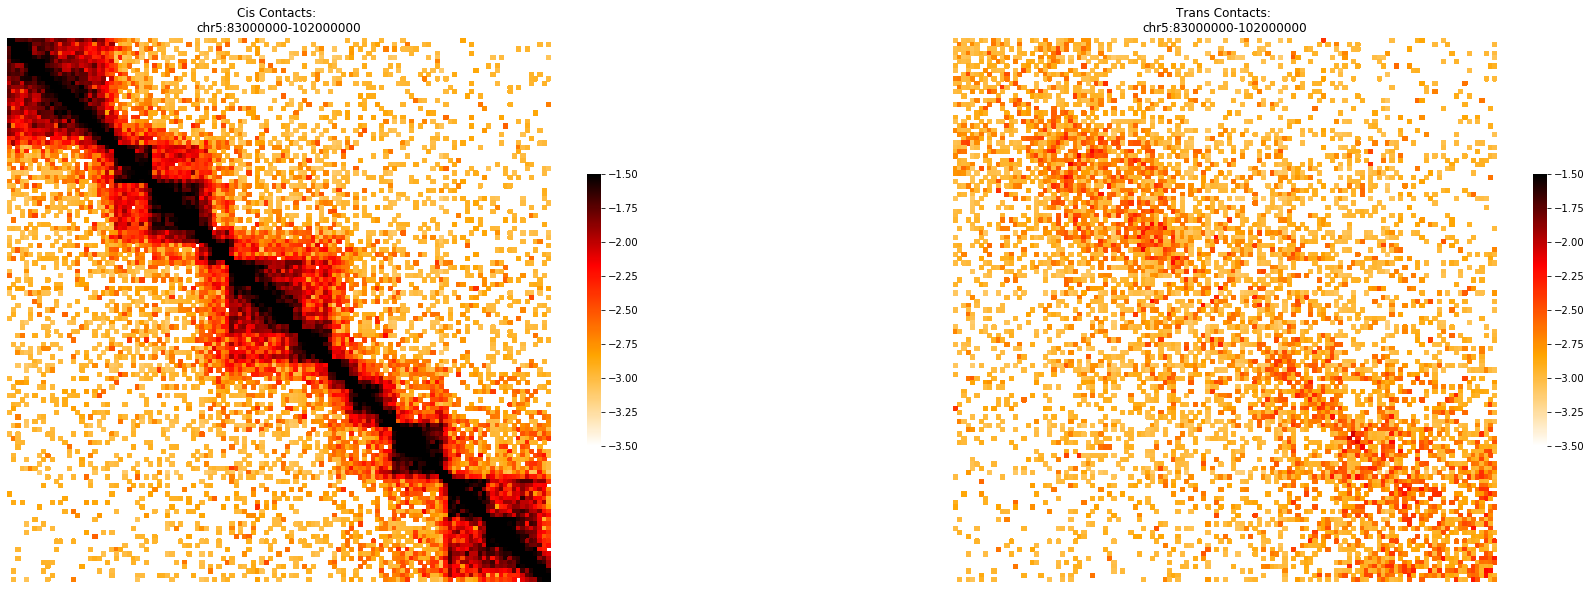

In [7]:
cmap = cl.LinearSegmentedColormap.from_list("fall", colors=["white", "orange" ,"red", "black"], N=256)


f, ax = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.3)
sbn.heatmap(np.log10(cisExamp), cmap=cmap, ax=ax[0], vmin=-3.5, vmax=-1.5,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5})
sbn.heatmap(np.log10(transExamp), cmap=cmap, ax=ax[1], vmin=-3.5, vmax=-1.5,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5})
ax[0].set_title("Cis Contacts: \nchr5:83000000-102000000")
ax[1].set_title("Trans Contacts: \nchr5:83000000-102000000")
f.set_size_inches(30, 10)
plt.show()

## Save to file

In [7]:
resultsdir = "/groups/gerlich/experiments/Experiments_004800/004869/Results/Sororin"
f.savefig(os.path.join(resultsdir, "chr5_examples_Sororin.png"), bbox_inches="tight")
f.savefig(os.path.join(resultsdir, "chr5_examples_Sororin.pdf"), bbox_inches="tight")

# Plot example on chromosome 1

In [29]:
# extract info
BINSIZE = 50000

clrs = {interType:
        cooler.Cooler(
            f'G2.Sororin-AID.wAuxin.{interType}.1000.mcool::/resolutions/{BINSIZE}')
        for interType in ["cis", "trans"]
        }

# Hollow example 1

coord = "chr1:212000000-222000000"

cisExamp = clrs["cis"].matrix(balance=True).fetch(coord)
transExamp = clrs["trans"].matrix(
    balance=True).fetch(coord)

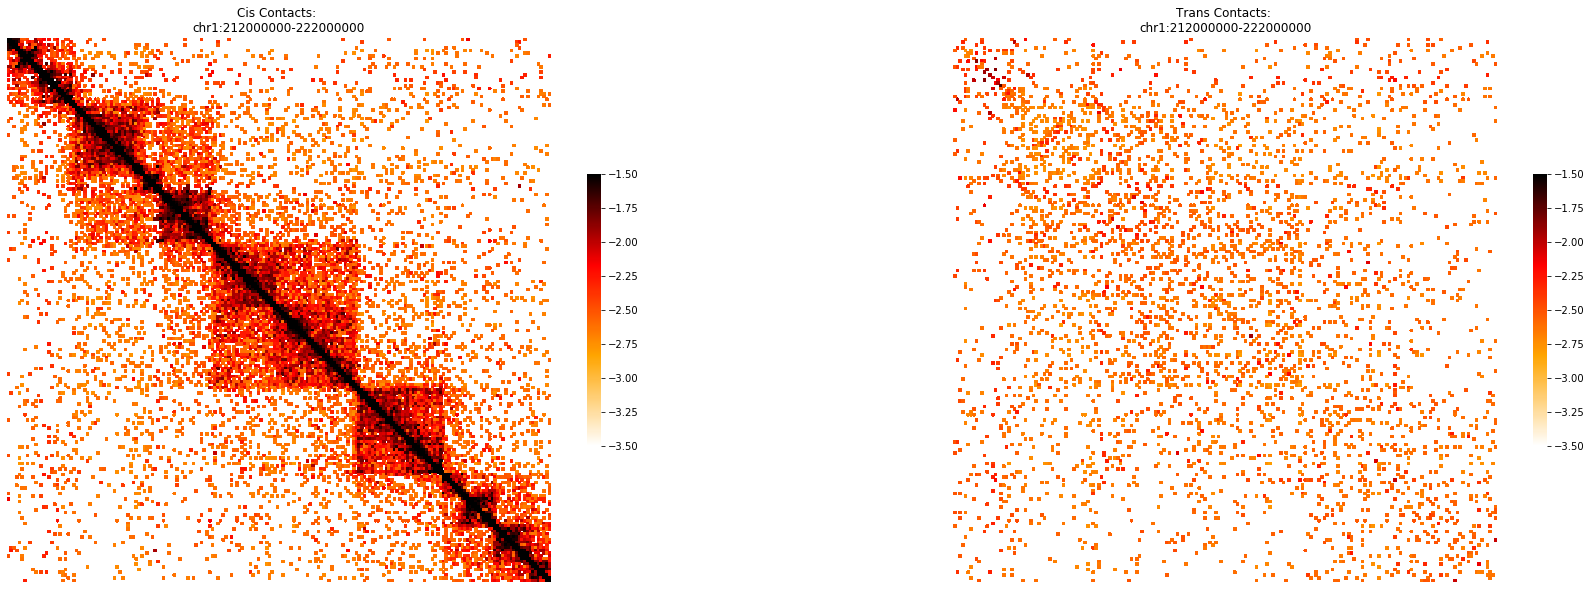

In [34]:
cmap = cl.LinearSegmentedColormap.from_list("fall", colors=["white", "orange" ,"red", "black"], N=256)


f, ax = plt.subplots(1, 2)
plt.subplots_adjust(wspace=0.3)
sbn.heatmap(np.log10(cisExamp), cmap=cmap, ax=ax[0], vmin=-3.5, vmax=-1.5,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5})
sbn.heatmap(np.log10(transExamp), cmap=cmap, ax=ax[1], vmin=-3.5, vmax=-1.5,
            square=True,
            xticklabels=False,
            yticklabels=False,
            rasterized=True,
            cbar_kws={"shrink": 0.5})
ax[0].set_title(f"Cis Contacts: \n{coord}")
ax[1].set_title(f"Trans Contacts: \n{coord}")
f.set_size_inches(30, 10)
plt.show()

## save to file

In [35]:
resultsdir = "/groups/gerlich/experiments/Experiments_004800/004869/Results/Sororin"
f.savefig(os.path.join(resultsdir, "chr1_examples_Sororin.png"), bbox_inches="tight")
f.savefig(os.path.join(resultsdir, "chr1_examples_Sororin.pdf"), bbox_inches="tight")